## Exercise 5.1, taken from Montgomery, Douglas C., et al. <u>Introduction to Linear Regression Analysis</u>, John Wiley & Sons, Incorporated, 2012.

5.1 Byers and Williams (“Viscosities of Binary and Ternary Mixtures of Polyaromatic Temperatures,” Journal of Chemical and Engineering Data, 32, 349–354, 1987) studied the impact of temperature (the regressor) on the viscosity (the response) of toluene-tetralin blends. The following table gives the data for blends with a 0.4 molar fraction of toluene.

**a. Plot a scatter diagram. Does it seem likely that a straight-line model will be adequate?**

The scatter plot looks near-linear, which suggests a linear fit would be a good estimate of the relationship between viscosity and temperature.

,Temperature(Celsius),Viscosity(mPa*s)
0,24.9,1.1330
1,35.0,0.9772
2,55.1,0.7550
3,65.2,0.6723
4,75.2,0.6021
5,85.2,0.5420
6,95.2,0.5074


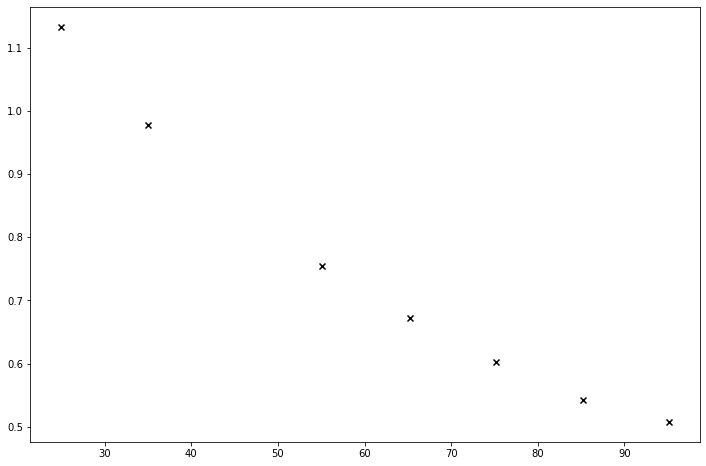

In [6]:
import pandas as pd
import statsmodels.api as sm

#Import toluene-tetralin blend viscosity data
dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/data-table-51.csv")
display(dataset.head(8))

# Creating X and y
X1 = dataset['Temperature(Celsius)']
y1 = dataset['Viscosity(mPa*s)']

import matplotlib.pyplot as plt

# basic scatterplot 
plt.figure(figsize=(12,8))
plt.scatter(X1,y1,label='Observations', marker='x', color='black')

**b. Fit the straight-line model. Compute the summary statistics and the residual plots. What are your conclusions regarding model adequacy?**

The linear model summary statistics indicate that the model is significant (p-value: 8.82e-05) and close to a good fit (Adjusted R-squared:  0.956). However, the residual plot demonstrates that variance is not constant, violating one of the essential conditions required to use a least-squares estimate.

,Temperature(Celsius),Viscosity(mPa*s)
0,24.9,1.1330
1,35.0,0.9772
2,55.1,0.7550
3,65.2,0.6723
4,75.2,0.6021
5,85.2,0.5420
6,95.2,0.5074


C:\JupyterLab\resources\jlab_server\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Viscosity   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     131.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           8.82e-05
Time:                        14:47:41   Log-Likelihood:                 12.358
No. Observations:                   7   AIC:                            -20.72
Df Residuals:                       5   BIC:                            -20.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2961      0.052     25.028      0.000       1.163       1.429
Temperature    -0.0089      0.001    -11.472      0.000      -0.011      -0.007
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.868
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.693
Skew:                           0.400   Prob(JB):                        0.707
Kurtosis:                       1.682   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


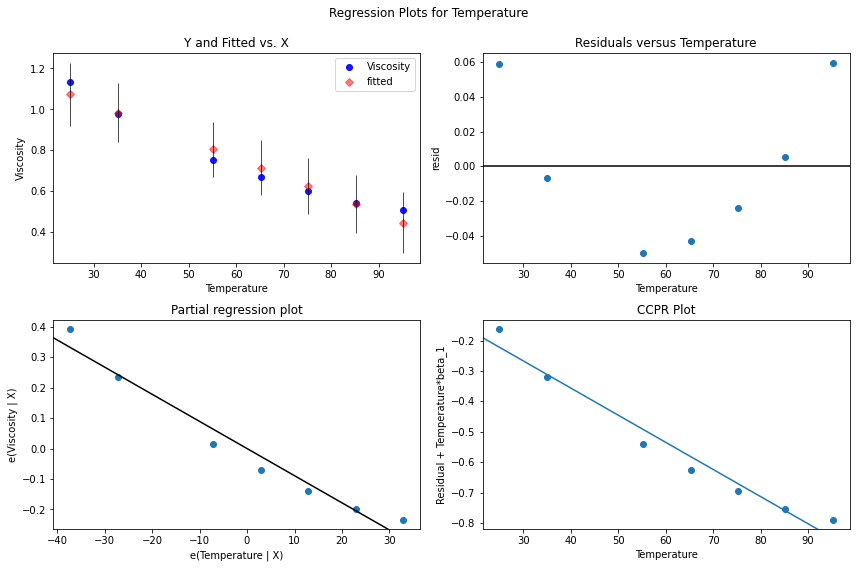

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

#Import toluene-tetralin blend viscosity data
dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/data-table-51.csv")
display(dataset.head(8))

# Creating X and y
X1 = dataset['Temperature(Celsius)']
y1 = dataset['Viscosity(mPa*s)']
dat51 = pd.DataFrame(X1).join(pd.DataFrame(y1))
# Change the column names
dat51.columns =['Temperature', 'Viscosity']

# calculate least square estimate coefficients using linear model
lm51 = sm.formula.ols('Viscosity ~ Temperature', dat51).fit()
display(lm51.summary())

# produce four diagnostic plots, including residuals
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm51, 'Temperature', fig=fig)
plt.show()

**Fit a Box-Cox power transformation.  Does it appear that a power transform would stabilize the variance?  What value of lambda would you select?**

First, we need to create a liklihood function for Box-Cox transformation on linear models, which is not the same as a Box-Cox transformation on a single variable. To my knowledge, python libraries do not provide this functionality.

Box-Cox power transformations typically stabilize normality, not variance, but we can perform the analysis and see if variance changes. The Box-Cox estimate of a good power transformation suggests lamda < 0, in which case we can typically use the generated value as an exponent in a power transformation. To perform the same analysis as the R MASS library's boxcox function, we look at 100 possible lambdas between -2 and 2, and compare their liklihoods. In this case, the lambda with the highest linear model liklihood is lambda = -0.7878787878787878.

Normality is much improved and the variance plot looks more random, indicating more constant variance. 

Likehood for one-dimensional lambda (wrong): -1.1445970882086411 [25.5889634]
Likehood for linear model lambda (correct): -0.7878787878787878 [28.96988646]


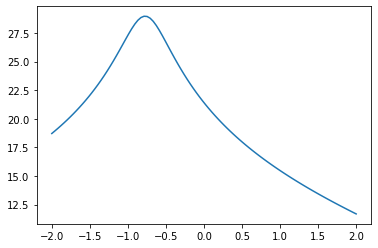

Best estimate for lambda: -0.7878787878787878


In [44]:
import numpy as np
import scipy.stats as stats

# generates likelihood for input lmbda for a Box-Cox transformation on linear model represented by predictor 
# variable values x with response values y
# x must contain 2 columns or more, as there must be a column of ones to represent the constant coefficient
def log_likelihood(lmbda, x, y):
    n, p = x.shape
    lnjacobi = (lmbda - 1) * np.sum(np.log(y))
    trans_y = stats.boxcox(y, lmbda=lmbda)
    xtxinv = np.linalg.inv(np.matmul(np.transpose(x), np.asarray(x)))
    imxxtxinvxt = np.subtract(np.identity(n), np.matmul(np.matmul(np.asarray(x), xtxinv), np.asarray(np.transpose(x))))
    rss = np.matmul(np.matmul(np.transpose(trans_y), np.asarray(imxxtxinvxt)), trans_y)
    logrss = np.log(rss)
    # handle simple linear regression case when there is one predictor variable and logrss is a scalar
    if not isinstance(logrss, np.ndarray):
        logrss = np.array(logrss)
    return - n / 2.0 * np.ndarray.flatten(logrss) + lnjacobi

import pandas as pd

#Import toluene-tetralin blend viscosity data
dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/data-table-51.csv")

# Creating X and y
X1 = dataset['Temperature(Celsius)']
y1 = dataset['Viscosity(mPa*s)']

# Add a list of ones with length of X1 to identify intercept terms in linear model
x = sm.add_constant(X1)

#perform python Box-Cox transformation on response y1 alone and check likelihood, won't be the most likely
transformed_data, lmbda = stats.boxcox(y1) 
print('Likehood for one-dimensional lambda (wrong):', lmbda, log_likelihood(lmbda, x, y1))

#display liklihood for a more likely lambda, higher liklihood is a better transform
print('Likehood for linear model lambda (correct):', -0.7878787878787878, log_likelihood(-0.7878787878787878, x, y1))

#Consider many lambda values between -2 and 2, and isolate the highest liklihood, as in R MASS library
potential_lmbdas = np.linspace(-2.0, 2.0, 100)
likelihoods = np.array([log_likelihood(lmbda, x, y1) for lmbda in potential_lmbdas])
plt.plot(potential_lmbdas, likelihoods)
plt.show()
best_lambda = potential_lmbdas[np.argmax(likelihoods)]
print('Best estimate for lambda:', best_lambda)

**Transform the data and fit again.  Check for model adequacy and comment on significance of regression with transformed data.**

With so few data points, the outliers may have a lot of leverage (leverage analysis is in a subsequent example). The residuals plot indicates that the variance is closer to constant, with all marginal errors between 0.020 and -0.015. Normality is also more likely with all points in almost a straight line. The model fit demonstrates improved in significance (lower p-vlaue) and accuracy (higher r-squared) as well.

Best estimate for lambda: -0.7878787878787878


C:\JupyterLab\resources\jlab_server\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_Viscosity   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.999
Method:                    Least Squares   F-statistic:                     5049.
Date:                   Wed, 13 Apr 2022   Prob (F-statistic):           1.05e-08
Time:                           18:25:06   Log-Likelihood:                 23.271
No. Observations:                      7   AIC:                            -42.54
Df Residuals:                          5   BIC:                            -42.65
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6141      0.011     56.380      0.000       0.586       0.642
Temperature     0.0116      0.000     71.056      0.000       0.011       0.012
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.172
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.424
Skew:                           0.591   Prob(JB):                        0.809
Kurtosis:                       2.761   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


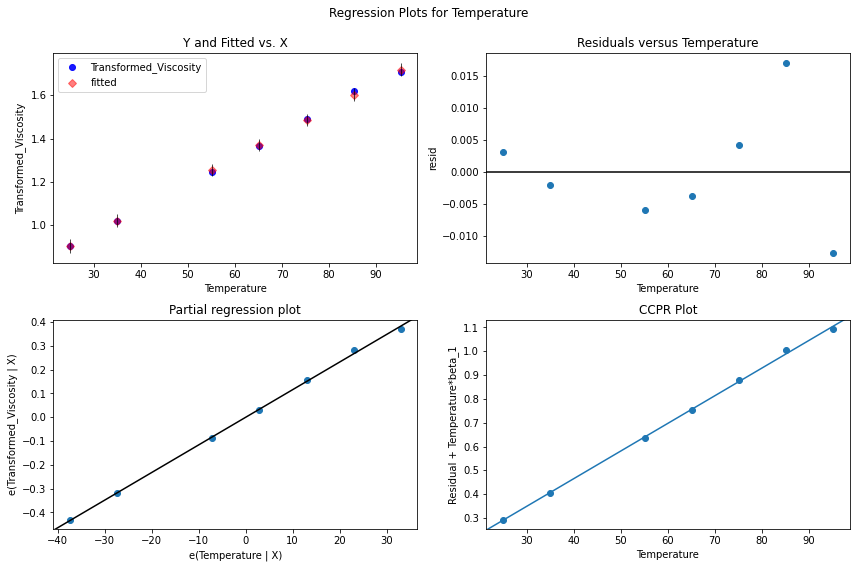

In [43]:
import numpy as np
import scipy.stats as stats

# generates likelihood for input lmbda for a Box-Cox transformation on linear model represented by predictor 
# variable values x with response values y
# x must contain 2 columns or more, as there must be a column of ones to represent the constant coefficient
def log_likelihood(lmbda, x, y):
    n, p = x.shape
    lnjacobi = (lmbda - 1) * np.sum(np.log(y))
    trans_y = stats.boxcox(y, lmbda=lmbda)
    xtxinv = np.linalg.inv(np.matmul(np.transpose(x), np.asarray(x)))
    imxxtxinvxt = np.subtract(np.identity(n), np.matmul(np.matmul(np.asarray(x), xtxinv), np.asarray(np.transpose(x))))
    rss = np.matmul(np.matmul(np.transpose(trans_y), np.asarray(imxxtxinvxt)), trans_y)
    logrss = np.log(rss)
    # handle simple linear regression case when there is one predictor variable and logrss is a scalar
    if not isinstance(logrss, np.ndarray):
        logrss = np.array(logrss)
    return - n / 2.0 * np.ndarray.flatten(logrss) + lnjacobi

import pandas as pd

#Import toluene-tetralin blend viscosity data
dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/data-table-51.csv")

# Creating X and y
X1 = dataset['Temperature(Celsius)']
y1 = dataset['Viscosity(mPa*s)']

# Add a list of ones with length of X1 to identify intercept terms in linear model
x = sm.add_constant(X1)

#Consider many lambda values between -2 and 2, and isolate the highest liklihood, as in R MASS library
potential_lmbdas = np.linspace(-2.0, 2.0, 100)
likelihoods = np.array([log_likelihood(lmbda, x, y1) for lmbda in potential_lmbdas])
best_lambda = potential_lmbdas[np.argmax(likelihoods)]
print('Best estimate for lambda:', best_lambda)

transformed_data = y1**best_lambda

dat51 = pd.DataFrame(X1).join(pd.DataFrame(transformed_data))
# Change the column names
dat51.columns =['Temperature', 'Transformed_Viscosity']

# calculate least square estimate coefficients using linear model
lm51 = sm.formula.ols('Transformed_Viscosity ~ Temperature', dat51).fit()
display(lm51.summary())

# produce four diagnostic plots, including residuals
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm51, 'Temperature', fig=fig)
plt.show()